In [1]:
import networkx as nx

### Functions

In [2]:
def readlines(path:str):
    with open(path, 'r') as f:
        data = [tuple(x.strip().split("-")) for x in f.readlines()]
    return data

### Load data

In [3]:
testdata=readlines("data/test12.txt")
data=readlines("data/data12.txt")

In [4]:
def find_all_paths(graph, start, end, path=[]):
        path = path + [start]
        if start == end:
            return [path]
        
        paths = []
        for node in graph[start]:
            if (node.islower() and node not in path) or node.isupper():
                newpaths = find_all_paths(graph, node, end, path)
                for newpath in newpaths:
                    paths.append(newpath)
        return paths     

In [5]:
def find_all_paths2(graph, start, end,flag, path=[]):
        path = path + [start]
        
        if start == end:
            return [path]
        
        paths = []
        for node in graph[start]:
            if (node.islower() and (node not in path or flag) and node!="start") or node.isupper():
                if node.islower() and node in path and flag:
                    newpaths = find_all_paths2(graph, node, end,False, path)
                else:
                    newpaths = find_all_paths2(graph, node, end,flag, path)
                for newpath in newpaths:
                    paths.append(newpath)
        return paths 

In [6]:
def solution1(data):
    G = nx.Graph(data)
    nx.draw_networkx(G, with_labels=True, node_size=500, pos=nx.kamada_kawai_layout(G))
    
    return len(find_all_paths(G,"start","end",[]))

In [7]:
def solution2(data):
    G = nx.Graph(data)
    nx.draw_networkx(G, with_labels=True, node_size=500, pos=nx.kamada_kawai_layout(G))
    
    result=find_all_paths2(G,"start","end",True,[])
   
    return len(result)

### Tests

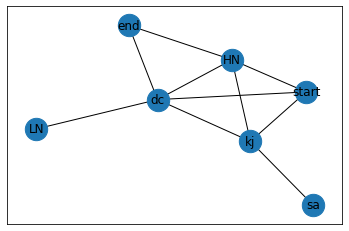

In [8]:
assert solution1(testdata)==19

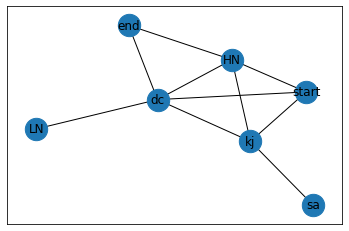

In [9]:
assert solution2(testdata)==103

### Solution 1

4104

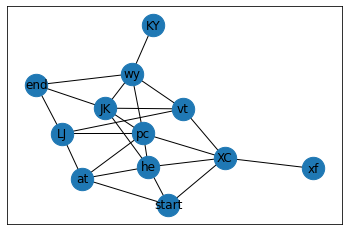

In [10]:
solution1(data)

### Solution 2

119760

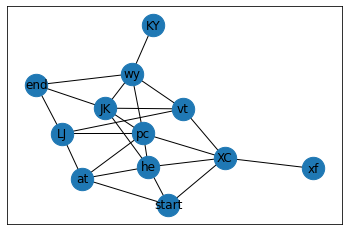

In [11]:
solution2(data)